## Business Understanding
Road accidents are the leading cause of death for individuals under the age of 30. Therefore it is in the interest of all parties to attempt to reduce this figure. This project aims to design a model that will predict the primary contributory cause of car accidents based on available data such as vehicle information, occupant details, road conditions, and environmental factors.


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data =  pd.read_csv("data/Traffic_Crashes_-_Crashes_20241208.csv")

In [3]:
data.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [4]:
data.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899390 entries, 0 to 899389
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                899390 non-null  object 
 1   CRASH_DATE_EST_I               66375 non-null   object 
 2   CRASH_DATE                     899390 non-null  object 
 3   POSTED_SPEED_LIMIT             899390 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         899390 non-null  object 
 5   DEVICE_CONDITION               899390 non-null  object 
 6   WEATHER_CONDITION              899390 non-null  object 
 7   LIGHTING_CONDITION             899390 non-null  object 
 8   FIRST_CRASH_TYPE               899390 non-null  object 
 9   TRAFFICWAY_TYPE                899390 non-null  object 
 10  LANE_CNT                       199021 non-null  float64
 11  ALIGNMENT                      899390 non-null  object 
 12  ROADWAY_SURFACE_COND          

We begin by searching for duplicated values

In [6]:
data.duplicated().mean()

np.float64(0.0)

We then search for missing values

In [7]:
data.isna().mean().sort_values(ascending=False)

WORKERS_PRESENT_I                0.998559
DOORING_I                        0.996832
WORK_ZONE_TYPE                   0.995684
WORK_ZONE_I                      0.994411
PHOTOS_TAKEN_I                   0.986333
STATEMENTS_TAKEN_I               0.977003
NOT_RIGHT_OF_WAY_I               0.954466
CRASH_DATE_EST_I                 0.926200
LANE_CNT                         0.778716
INTERSECTION_RELATED_I           0.770343
HIT_AND_RUN_I                    0.686385
REPORT_TYPE                      0.031074
LOCATION                         0.007230
LATITUDE                         0.007230
LONGITUDE                        0.007230
MOST_SEVERE_INJURY               0.002219
INJURIES_TOTAL                   0.002204
INJURIES_FATAL                   0.002204
INJURIES_INCAPACITATING          0.002204
INJURIES_NON_INCAPACITATING      0.002204
INJURIES_REPORTED_NOT_EVIDENT    0.002204
INJURIES_NO_INDICATION           0.002204
INJURIES_UNKNOWN                 0.002204
NUM_UNITS                        0

Columns with over 50% missing values are dropped. In addition columns that do not impact the cause of an accident, such as: 'PHOTOS_TAKEN_I' are dropped

In [8]:
data = data.drop(columns=['WORKERS_PRESENT_I', 'DOORING_I', 'WORK_ZONE_TYPE', 'WORK_ZONE_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 
                          'NOT_RIGHT_OF_WAY_I', 'CRASH_DATE_EST_I', 'LANE_CNT', 'INTERSECTION_RELATED_I', 'HIT_AND_RUN_I', 
                          'CRASH_RECORD_ID', 'REPORT_TYPE'], axis = 1)

In [9]:
data.isna().mean().sort_values(ascending=False)

LOCATION                         0.007230
LONGITUDE                        0.007230
LATITUDE                         0.007230
MOST_SEVERE_INJURY               0.002219
INJURIES_UNKNOWN                 0.002204
INJURIES_NO_INDICATION           0.002204
INJURIES_REPORTED_NOT_EVIDENT    0.002204
INJURIES_NON_INCAPACITATING      0.002204
INJURIES_INCAPACITATING          0.002204
INJURIES_FATAL                   0.002204
INJURIES_TOTAL                   0.002204
NUM_UNITS                        0.000007
BEAT_OF_OCCURRENCE               0.000006
STREET_DIRECTION                 0.000004
STREET_NAME                      0.000001
PRIM_CONTRIBUTORY_CAUSE          0.000000
TRAFFICWAY_TYPE                  0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
DEVICE_CONDITION                 0.000000
CRASH_MONTH                      0.000000
CRASH_DAY_OF_WEEK                0.000000
CRASH_HOUR                       0.000000
WEATHER_CONDITION                0.000000
LIGHTING_CONDITION               0

In [10]:
data.columns

Index(['CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'LOCATION'],
      dtype='object')

The remaining rows with missing values are dropped. These make up a very small proportion of the data, thus there is not much loss in dropping them.

In [11]:
data.dropna(inplace=True)

In [12]:
data.isna().mean().sort_values(ascending=False)

CRASH_DATE                       0.0
INJURIES_REPORTED_NOT_EVIDENT    0.0
NUM_UNITS                        0.0
MOST_SEVERE_INJURY               0.0
INJURIES_TOTAL                   0.0
INJURIES_FATAL                   0.0
INJURIES_INCAPACITATING          0.0
INJURIES_NON_INCAPACITATING      0.0
INJURIES_NO_INDICATION           0.0
STREET_NAME                      0.0
INJURIES_UNKNOWN                 0.0
CRASH_HOUR                       0.0
CRASH_DAY_OF_WEEK                0.0
CRASH_MONTH                      0.0
LATITUDE                         0.0
LONGITUDE                        0.0
BEAT_OF_OCCURRENCE               0.0
STREET_DIRECTION                 0.0
POSTED_SPEED_LIMIT               0.0
ALIGNMENT                        0.0
TRAFFIC_CONTROL_DEVICE           0.0
DEVICE_CONDITION                 0.0
WEATHER_CONDITION                0.0
LIGHTING_CONDITION               0.0
FIRST_CRASH_TYPE                 0.0
TRAFFICWAY_TYPE                  0.0
ROADWAY_SURFACE_COND             0.0
S

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890901 entries, 2 to 899389
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_DATE                     890901 non-null  object 
 1   POSTED_SPEED_LIMIT             890901 non-null  int64  
 2   TRAFFIC_CONTROL_DEVICE         890901 non-null  object 
 3   DEVICE_CONDITION               890901 non-null  object 
 4   WEATHER_CONDITION              890901 non-null  object 
 5   LIGHTING_CONDITION             890901 non-null  object 
 6   FIRST_CRASH_TYPE               890901 non-null  object 
 7   TRAFFICWAY_TYPE                890901 non-null  object 
 8   ALIGNMENT                      890901 non-null  object 
 9   ROADWAY_SURFACE_COND           890901 non-null  object 
 10  ROAD_DEFECT                    890901 non-null  object 
 11  CRASH_TYPE                     890901 non-null  object 
 12  DAMAGE                         8909

The column containing the date and time of the crash is converted into its proper datetime format

In [14]:
data['CRASH_DATE'] = pd.to_datetime(data['CRASH_DATE'], format='%m/%d/%Y %H:%M:%S %p')

Below, the columns with data type "object" are evaluated to understand the value_counts of each column. This will help exclude columns from the encoding process

In [15]:
for col in data.select_dtypes('object').columns:
    if (data[col].value_counts().size >30):
        print("-"*20)
        print(data[col].value_counts())

--------------------
DATE_POLICE_NOTIFIED
02/26/2020 08:30:00 AM    12
10/12/2020 04:00:00 PM    12
12/01/2023 05:30:00 PM    12
07/01/2021 07:00:00 PM    11
05/09/2022 05:00:00 PM    11
                          ..
10/02/2023 10:14:00 AM     1
10/17/2023 09:05:00 AM     1
12/14/2016 04:45:00 PM     1
06/07/2021 07:50:00 AM     1
10/23/2019 01:36:00 PM     1
Name: count, Length: 675820, dtype: int64
--------------------
PRIM_CONTRIBUTORY_CAUSE
UNABLE TO DETERMINE                                                                 348527
FAILING TO YIELD RIGHT-OF-WAY                                                        98545
FOLLOWING TOO CLOSELY                                                                86046
NOT APPLICABLE                                                                       46818
IMPROPER OVERTAKING/PASSING                                                          44489
FAILING TO REDUCE SPEED TO AVOID CRASH                                               37547
IMPROP

The two columns, 'DATE_POLICE_NOTIFIED' and 'LOCATION', dropped below have 675,820 and 318,275 different possible values. In addition as there is already a datetime column, the date the police are notified is quite irrelevant. The column STREET_NAME is dropped as well as there are longitiude and latitude columns which contain the same information

In [16]:
data = data.drop(columns=['DATE_POLICE_NOTIFIED', 'STREET_NAME', 'LOCATION'], axis=1)

In [17]:
data.drop(columns=['CRASH_DATE'], inplace=True)

In [18]:
data.drop(data[data['PRIM_CONTRIBUTORY_CAUSE'] == 'UNABLE TO DETERMINE'].index, axis=0, inplace=True)
data.drop(data[data['PRIM_CONTRIBUTORY_CAUSE'] == 'NOT APPLICABLE'].index, axis=0, inplace=True)

EDA

Below are the most common primary causes of accidents. It can be noted that most accidents are as a result of human error

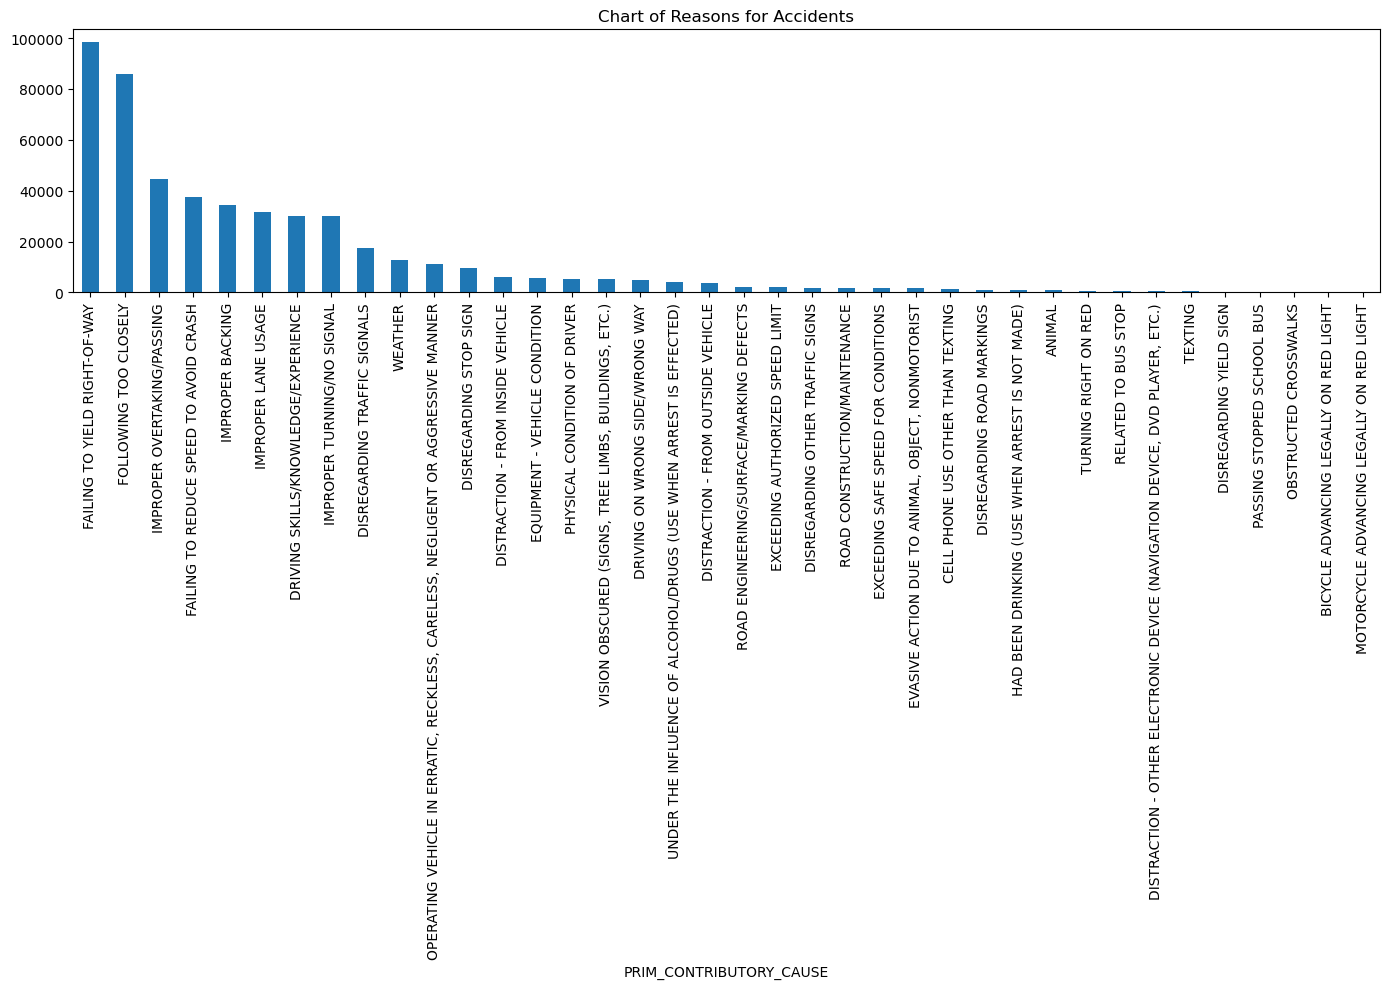

In [89]:
plt.figure(figsize=(14, 10))
data['PRIM_CONTRIBUTORY_CAUSE'].value_counts().plot.bar()
plt.title("Chart of Reasons for Accidents")
plt.tight_layout()  
plt.savefig("images/accident_causes.png")

The graph below shows us the distribution of crashes during the week. 1 represents Sunday and using this graph, it can be established that Friday is the day with the most accidents. This may be as a result of exhaustion, more vehicles on the road, among others

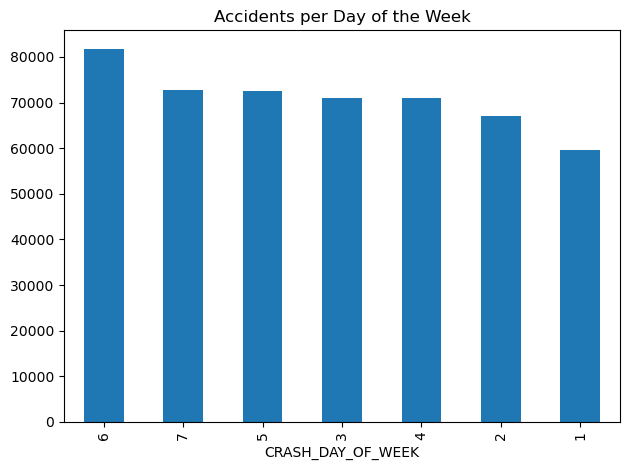

In [81]:
data['CRASH_DAY_OF_WEEK'].value_counts().plot.bar()
plt.title("Accidents per Day of the Week")
plt.tight_layout()  
plt.savefig("images/accident_days.png")

The chart below shows the distribution of accident throughout the hours in the day. As expected, most accidents occur during the evening rush hour when fatigue may begin to play a factor in addition to the large number of vehicles on the road at this time   

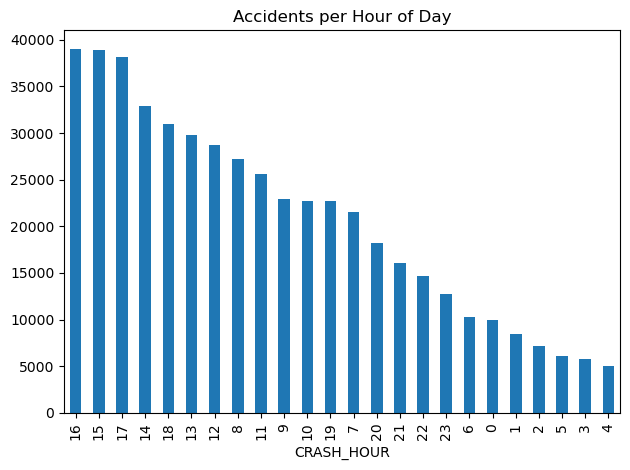

In [82]:
data['CRASH_HOUR'].value_counts().plot.bar()
plt.title("Accidents per Hour of Day")
plt.tight_layout() 
plt.savefig("images/accident_hours.png")

The graph below shows the value of damage caused during an accident. As expected with modern, expensive vehicles, most accidents cause damages in excess of $1,500

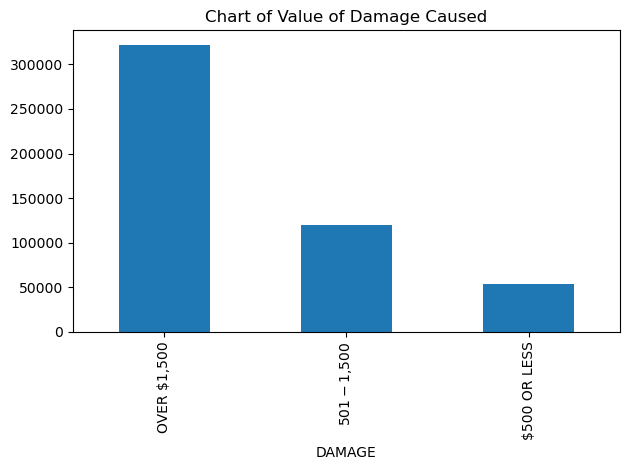

In [83]:
data['DAMAGE'].value_counts().plot.bar()
plt.title("Chart of Value of Damage Caused")
plt.tight_layout()  
plt.savefig("images/accident_costs.png")

MODELLING

In [19]:
X = data.drop(columns=['PRIM_CONTRIBUTORY_CAUSE'])
y = data['PRIM_CONTRIBUTORY_CAUSE']

The length of the value counts of the target variable is long andnthe percentages of each class are small, thus in order to enable the model to be more effective, the classes are binned.

In [20]:
y.value_counts(normalize=True)

PRIM_CONTRIBUTORY_CAUSE
FAILING TO YIELD RIGHT-OF-WAY                                                       0.198857
FOLLOWING TOO CLOSELY                                                               0.173635
IMPROPER OVERTAKING/PASSING                                                         0.089776
FAILING TO REDUCE SPEED TO AVOID CRASH                                              0.075767
IMPROPER BACKING                                                                    0.069439
IMPROPER LANE USAGE                                                                 0.063734
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                 0.060970
IMPROPER TURNING/NO SIGNAL                                                          0.060358
DISREGARDING TRAFFIC SIGNALS                                                        0.035201
WEATHER                                                                             0.025557
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE

In [21]:
cause_mapping = {
    # Driver behavior-related causes
    'FAILING TO YIELD RIGHT-OF-WAY': 'Driver Behavior',
    'FOLLOWING TOO CLOSELY': 'Driver Behavior',
    'IMPROPER OVERTAKING/PASSING': 'Driver Behavior',
    'FAILING TO REDUCE SPEED TO AVOID CRASH': 'Driver Behavior',
    'IMPROPER BACKING': 'Driver Behavior',
    'IMPROPER LANE USAGE': 'Driver Behavior',
    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'Driver Behavior',
    'IMPROPER TURNING/NO SIGNAL': 'Driver Behavior',
    'DISREGARDING TRAFFIC SIGNALS': 'Driver Behavior',
    'DISREGARDING STOP SIGN': 'Driver Behavior',
    'DISREGARDING YIELD SIGN': 'Driver Behavior',
    'DISREGARDING ROAD MARKINGS': 'Driver Behavior',
    'DISREGARDING OTHER TRAFFIC SIGNS': 'Driver Behavior',
    'EXCEEDING AUTHORIZED SPEED LIMIT': 'Driver Behavior',
    'EXCEEDING SAFE SPEED FOR CONDITIONS': 'Driver Behavior',
    'DRIVING ON WRONG SIDE/WRONG WAY': 'Driver Behavior',
    'TURNING RIGHT ON RED': 'Driver Behavior',
    'PASSING STOPPED SCHOOL BUS': 'Driver Behavior',

    # Environmental causes
    'WEATHER': 'Environmental',
    'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 'Environmental',
    'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 'Environmental',
    'ROAD CONSTRUCTION/MAINTENANCE': 'Environmental',
    'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST': 'Environmental',

    # Distraction-related causes
    'DISTRACTION - FROM INSIDE VEHICLE': 'Distraction',
    'DISTRACTION - FROM OUTSIDE VEHICLE': 'Distraction',
    'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)': 'Distraction',
    'CELL PHONE USE OTHER THAN TEXTING': 'Distraction',
    'TEXTING': 'Distraction',

    # Physical and substance-related causes
    'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'Substance-Related',
    'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 'Substance-Related',
    'PHYSICAL CONDITION OF DRIVER': 'Physical Condition',
    'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'Driver Behavior',

    # Equipment-related causes
    'EQUIPMENT - VEHICLE CONDITION': 'Vehicle Issue',

    # Uncommon or rare causes
    'ANIMAL': 'Other',
    'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 'Other',
    'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': 'Other',
    'RELATED TO BUS STOP': 'Other',
    'OBSTRUCTED CROSSWALKS': 'Other',

    # Uncategorized causes
    'UNABLE TO DETERMINE': 'Uncategorized',  # To be dropped
    'NOT APPLICABLE': 'Uncategorized',  # To be dropped
}

y = y.map(cause_mapping)
y

2         Driver Behavior
46        Driver Behavior
56        Driver Behavior
63        Driver Behavior
74        Driver Behavior
               ...       
899384    Driver Behavior
899385    Driver Behavior
899386    Driver Behavior
899387      Environmental
899389              Other
Name: PRIM_CONTRIBUTORY_CAUSE, Length: 495556, dtype: object

In [22]:
y.isna().mean()

np.float64(0.0)

Below, dummies are added to the data with drop first set to true in order to reduce data leakage

In [23]:
X_edited = pd.get_dummies(X, drop_first=True)

Pandas sets the dummies to true or false, so this is changed below to integer values

In [24]:
for col in X_edited.select_dtypes('bool').columns:
    X_edited[col] = X_edited[col].astype(int)

In [25]:
X_edited.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495556 entries, 2 to 899389
Columns: 159 entries, POSTED_SPEED_LIMIT to MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT
dtypes: float64(11), int64(148)
memory usage: 604.9 MB


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

The data is split into training and testing data below using a ratio of 75/25

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_edited, y, test_size=0.25, random_state=42)

Below is the baseline model. No hyperparameters are set

It obtains a train score of 100%, indicating overfitting

In [28]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
acc = accuracy_score(y_train, train_pred)
acc

1.0

In [29]:
test_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
test_acc

0.8336736917724737

As you can see, model has overfit. Let's do some feature selection

Below is the second model which uses the criterion 'entropy' and limits features to 5.

The model still overfits

In [30]:
clf_fs = DecisionTreeClassifier(criterion='entropy', random_state=42, max_features=5)
clf_fs.fit(X_train, y_train)
fs_train_pred = clf_fs.predict(X_train)
fs_train_acc = accuracy_score(y_train, fs_train_pred)
fs_train_acc

1.0

The testing score is 83.5% which may not be preferrable as naively predicting human error would lead to an accuracy score of 89% 

In [31]:
fs_test_pred = clf_fs.predict(X_test)
fs_test_acc = accuracy_score(y_test, fs_test_pred)
fs_test_acc

0.8352961118420522

In [32]:
feature_importances = pd.DataFrame({
    'Feature': X_edited.columns,
    'Importance': clf_fs.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                                      Feature  Importance
15                                  LONGITUDE    0.066629
14                                   LATITUDE    0.066477
1                                   STREET_NO    0.064589
2                          BEAT_OF_OCCURRENCE    0.061942
11                                 CRASH_HOUR    0.057264
..                                        ...         ...
35                   DEVICE_CONDITION_MISSING    0.000039
20          TRAFFIC_CONTROL_DEVICE_NO PASSING    0.000023
40  DEVICE_CONDITION_WORN REFLECTIVE MATERIAL    0.000019
28    TRAFFIC_CONTROL_DEVICE_RR CROSSING SIGN    0.000017
10                           INJURIES_UNKNOWN    0.000000

[159 rows x 2 columns]


In [33]:
X_edited

,POSTED_SPEED_LIMIT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,...,SEC_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"SEC_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",SEC_CONTRIBUTORY_CAUSE_WEATHER,STREET_DIRECTION_N,STREET_DIRECTION_S,STREET_DIRECTION_W,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT"
2,30,2101,1235.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,1,0,0
46,30,13241,533.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,1,0,0,1,0,0
56,30,3436,1121.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,1,0,1,0,0
63,30,3120,2511.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0,0,0,1,0,0,0,1,0,0
74,30,1700,2423.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899384,30,3959,1732.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0,0,0,1,0,0,0,1,0,0
899385,30,6799,2412.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,1,0,0,1,0,0,0
899386,30,4632,813.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,1,0,1,0,0
899387,30,4721,223.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0


In [34]:
y.value_counts(normalize=True)

PRIM_CONTRIBUTORY_CAUSE
Driver Behavior       0.894954
Environmental         0.047038
Distraction           0.023307
Vehicle Issue         0.011006
Physical Condition    0.010606
Substance-Related     0.010170
Other                 0.002918
Name: proportion, dtype: float64

In [35]:
from imblearn.over_sampling import SMOTE

Below the training data is resampled using SMOTE

In [36]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

The model below is similar to the model above, however to reduce overfitting, the max depth of the tree in set to 30.

This leads to a training score of 99.2%

In [50]:
clf_smote = DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=42)
clf_smote.fit(X_train_resampled, y_train_resampled)
smote_train_pred = clf_smote.predict(X_train_resampled)
smote_train_acc = accuracy_score(y_train_resampled, smote_train_pred)
smote_train_acc

0.9918755065734343

In [94]:
f1_score(y_train_resampled, smote_train_pred, average='weighted')

np.float64(0.9918686196258709)

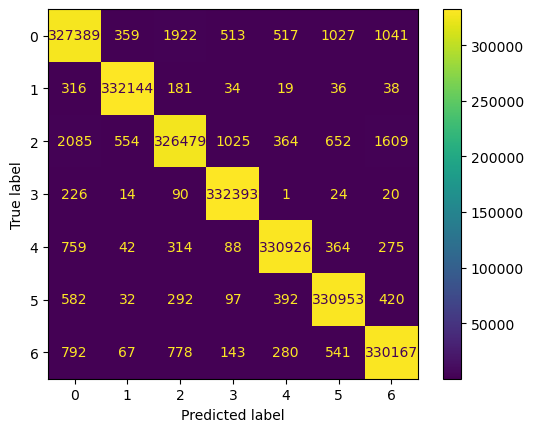

In [54]:
conf_matrix_train = confusion_matrix(y_train_resampled, smote_train_pred)
ConfusionMatrixDisplay(conf_matrix_train).plot()
plt.show()

The test score drops slightly to 81.9%, but the F1 score is at 82.8%, which means that the model is not naively predicting the largest class 

In [51]:
smote_test_pred = clf_smote.predict(X_test)
smote_test_acc = accuracy_score(y_test, smote_test_pred)
smote_test_acc

0.8189346915383933

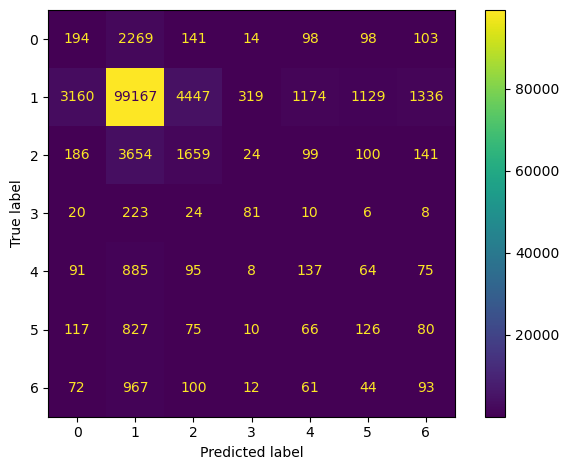

In [91]:
conf_matrix = confusion_matrix(y_test, smote_test_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.tight_layout()
plt.savefig("images/conf_matrix")
plt.show()

In [53]:
smote_f1_score = f1_score(y_test, smote_test_pred, average='weighted')
smote_f1_score

np.float64(0.8276255163193378)

This is actually pretty good, considering the lack of balance in the dataset

## Recommendations
1. **Address Human Error**:
   - As human error, particularly **failing to yield**, is the leading cause of accidents in the dataset:
     - Improve signage to clearly indicate yield points.
     - Provide better driver training to reduce accidents caused by human error.

2. **Enhance Modeling Techniques**:
   - Use more advanced models based on decision trees, such as **Random Forests**, to improve predictive performance.
   